## Saturating Forecasts

### Forecasting Growth

By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usaully some maximum achievble point: toatl market size, total population size, ect. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a logistic growth trend model, with a specified carrying capacity. We illustrate this with the log number of page visits to the R (programming language) page on Wikipedia:

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Disable warning from Numpy float conversion
import warnings
warnings.filterwarnings(action='once')
# ignore all warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('example_wp_R.csv')
df['y'] = np.log(df['y'])

We must specify the carrying capacity in a column cap. Here we will assume a particular value, but this would usually be set using data or experise about the market size.

In [3]:
df['cap'] = 8.5

The important things to note are that cap must be specified for every row in the dataframe, and that is does not have to be constant. If the market size is growing, then cap can be an increasing sequence.

We then fit the model as before, except pass in an additional argument to specify logistic growth.

In [4]:
m = Prophet(growth='logistic')

In [5]:
# By default, daily seasonality is disabled
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep the capacity constant at the same value as in the history, and forecast three years into the future:

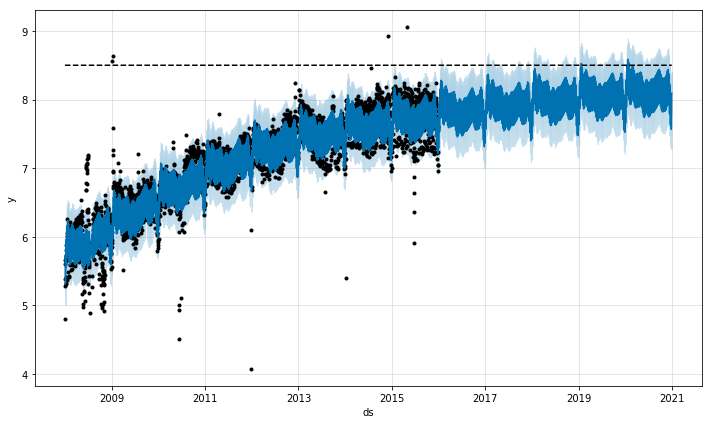

In [6]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

### Saturating Minimum

The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum:

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


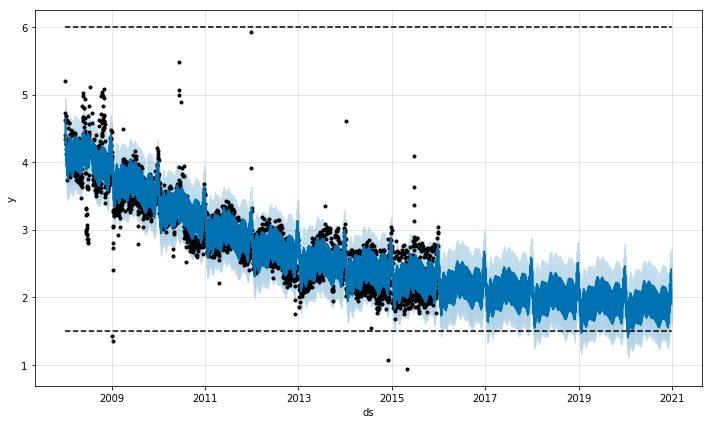

In [7]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
m.plot(fcst)

To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.